In [1]:
import pandas as pd #requier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #requier,uses pandas
from matplotlib import rcParams

## Задание 1. Работа с реальными данными

In [61]:
def read_gff(path_to_file: str) -> pd.DataFrame:
    return pd.read_csv(f'{path_to_file}', sep = '\t', comment='#',
                       names = ['chromosome', 'source', 'type', 'start', 'end',
                                'score', 'strand', 'phase', 'attributes'])

rna_annotation = read_gff('data/rrna_annotation.gff')

attribute_names = ['Name=16S_rRNA.*$', 'Name=23S_rRNA.*$','Name=5S_rRNA.*$']
rna_annotation['attributes'] = rna_annotation['attributes'].replace(attribute_names, ['16S', '23S', '5S'],
                                                                    regex=True)
rna_annotation.head()

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,23S


In [62]:
def read_bed6(path_to_file: str) -> pd.DataFrame:
    return pd.read_csv(f'{path_to_file}', sep='\t',
                       names = ['chromosome', 'start', 'end',
                                'name', 'score', 'strand'])

alignment = read_bed6('data/alignment.bed')

In [4]:
rna_annotation_tw_thr = rna_annotation[rna_annotation['attributes'] == '23S']
s23_count = rna_annotation_tw_thr['chromosome'].value_counts()

rna_annotation_six = rna_annotation[rna_annotation['attributes'] == '16S']
s16_count = rna_annotation_six['chromosome'].value_counts()

rna_annotation_five = rna_annotation[rna_annotation['attributes'] == '5S']
s5_count = rna_annotation_five['chromosome'].value_counts()

In [5]:
rna_count_table = pd.concat([s5_count.rename('5S'), s16_count.rename('16S'), s23_count.rename('23S')], axis = 1).sort_index()
rna_count_table = rna_count_table.reset_index(level=0).rename({'index' : 'Sequence'}, axis = 'columns')

#rna_final_table = pd.melt(rna_count_table, id_vars='Sequence', var_name='rRNA', value_name='Count')
#rna_final_table.head()

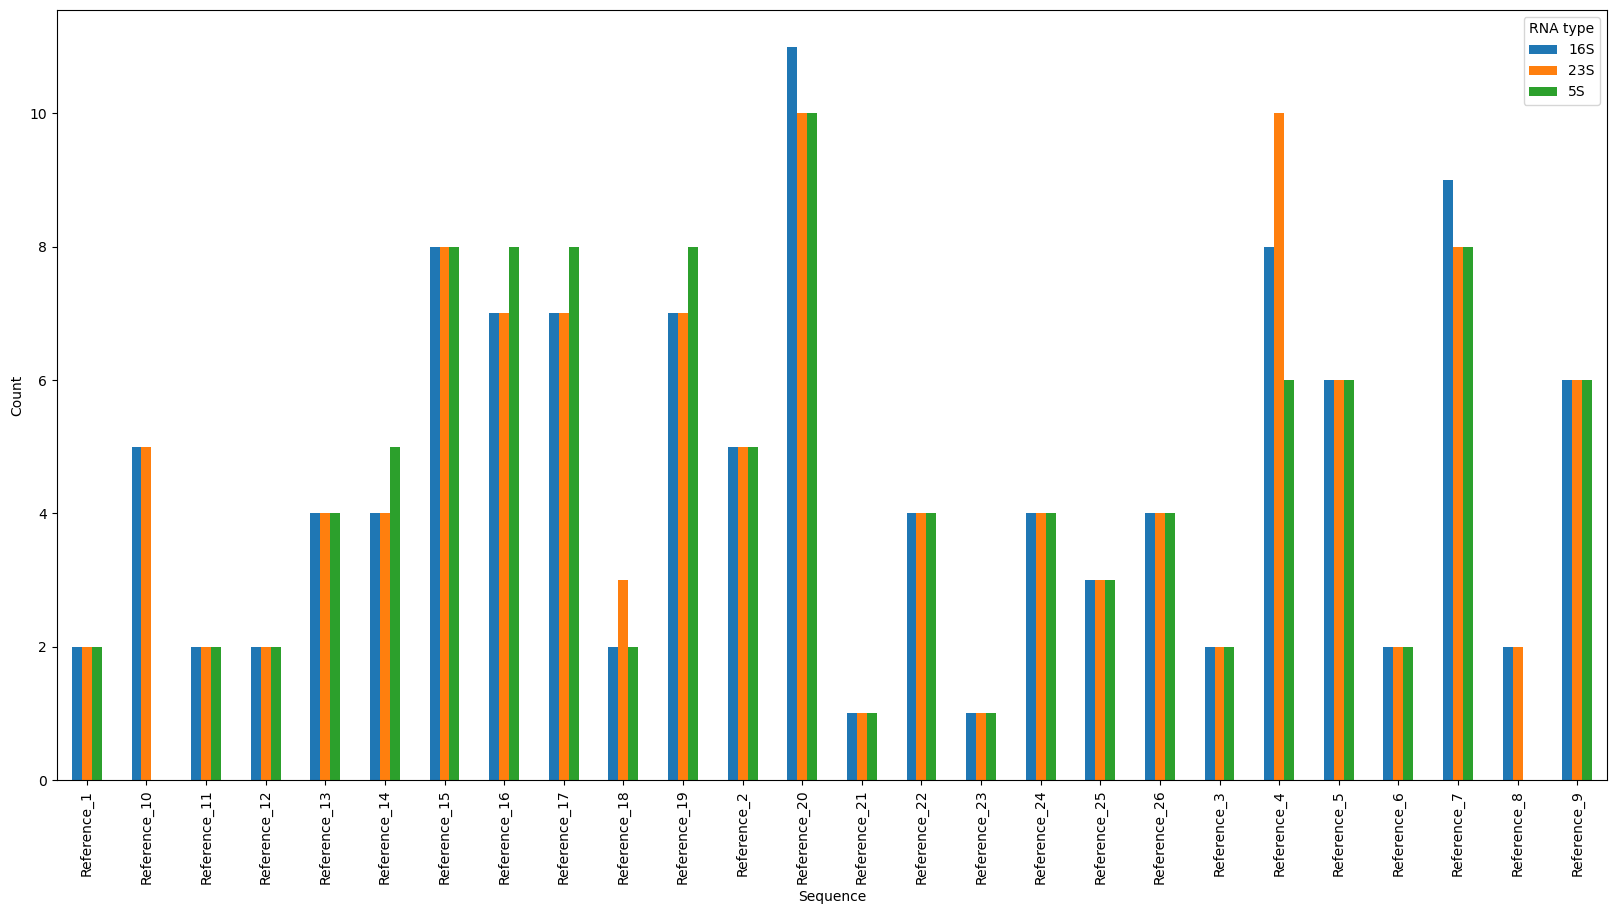

In [56]:
plt.style.use('default')
rna_count_table.plot(x='Sequence', y=['16S', '23S', '5S'], kind='bar', figsize=(20, 10))
plt.ylabel('Count')
plt.legend(title='RNA type')

In [63]:
rna_annotation['interval_ann'] = rna_annotation.apply(lambda row: (row.start, row.end), axis = 1)
alignment['interval_align'] = alignment.apply(lambda row: (row.start - 1, row.end + 1), axis = 1)


In [64]:
# Function to check if any two intervals overlap
def intersect(first: tuple, second: tuple) -> bool:
    if first[0] >= second[0] and first[1] <= second[1]:
            return True
    return False

In [66]:
df_merge = rna_annotation.merge(alignment, on='chromosome')
df_merge = df_merge[df_merge.apply(lambda row : intersect(row.interval_ann, row.interval_align), axis = 1)]
df_merge.drop(['interval_ann', 'interval_align'], axis=1, inplace=True)

In [67]:
df_merge

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


## Задание 2. Кастомизация графиков

In [146]:
from matplotlib.ticker import AutoMinorLocator
import heapq

In [148]:
volcano_data = pd.read_csv('data/diffexpr_data.tsv.gz', sep = '\t')
volcano_data

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


In [149]:
def vol_col(table: pd.DataFrame) -> str:
    logfc, pval = table
    if logfc < 0 and pval < 0.05:
        return 'Significantly down-regulated'
    if logfc < 0 and pval > 0.05:
        return 'Non-significantly down-regulated'
    if logfc > 0 and pval < 0.05:
        return 'Significantly up-regulated'
    return 'Non-significantly up-regulated'

volcano_data['regulation'] = volcano_data[['logFC', 'pval_corr']].apply(vol_col, axis=1)

# Setting palette for the legend
palette = {'Significantly down-regulated': '#377eb8', 'Significantly up-regulated': '#ff7f00', 'Non-significantly down-regulated': '#4daf4a', 'Non-significantly up-regulated': '#e41a1c'}

# Setting x-limits
min_max = abs(min(volcano_data['logFC']) - 1), abs(max(volcano_data['logFC']) + 1)
max_val = max(min_max)
sim_bord = [-max_val, max_val]

# Adding annotation to top genes
def get_samples(dataframe: pd.DataFrame):
    up_dataframe = dataframe.loc[(dataframe['regulation'] == 'Significantly up-regulated') & (dataframe['pval_corr'] < 0.05)]
    down_dataframe = dataframe.loc[(dataframe['regulation'] == 'Significantly down-regulated') & (dataframe['pval_corr'] < 0.05)]
    reg = heapq.nlargest(2, up_dataframe.logFC) + [-x for x in heapq.nlargest(2, abs(down_dataframe.logFC))]
    samples = []
    pval = []
    for val in reg:
        float_val = float(val)
        samples.append(dataframe.loc[dataframe['logFC'] == float_val, 'Sample'].iloc[0])
        pval.append(dataframe.loc[dataframe['logFC'] == float_val, 'log_pval'].iloc[0])
    return reg, samples, pval

reg, samples_exp, log_pval = get_samples(volcano_data)

In [44]:
# Changing font to stix; setting specialised math font properties
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'STIXGeneral:italic:bold'

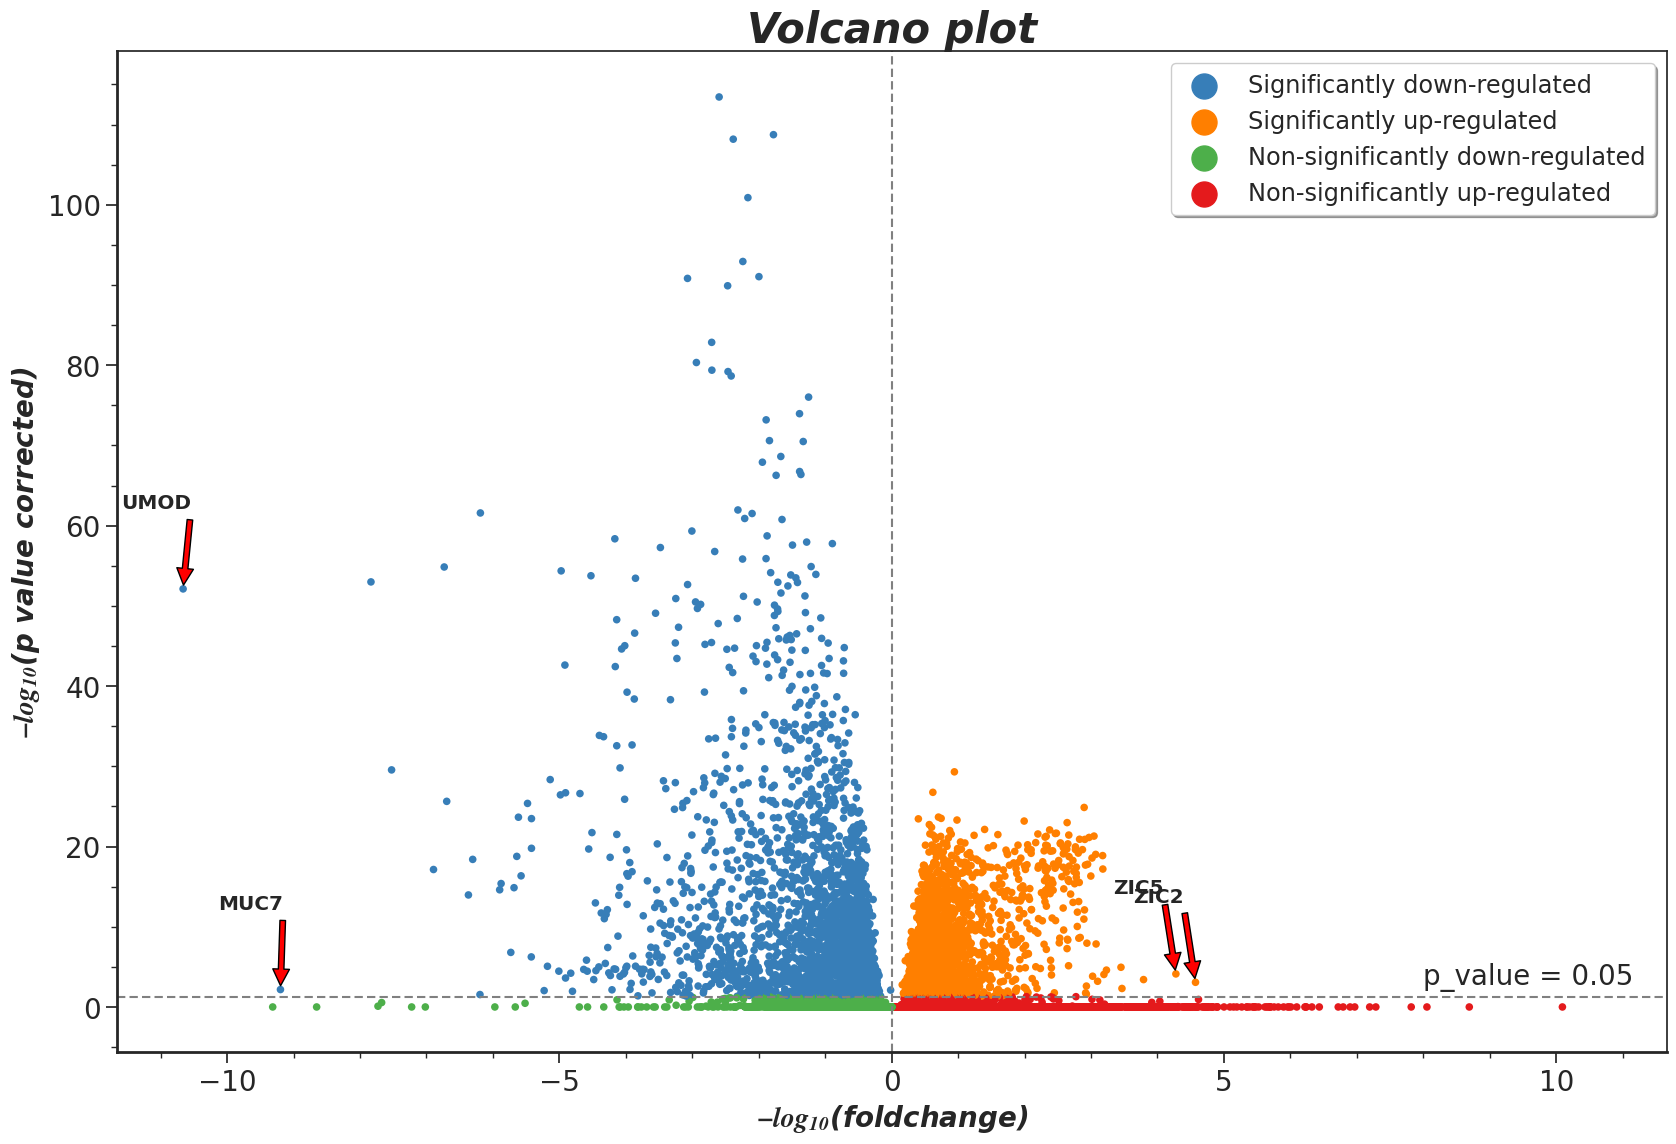

In [46]:
# Setting figure size and enabling ticks
sns.set(rc={'figure.figsize':(20,13), "xtick.bottom" : True, "ytick.left" : True})
sns.set_style('ticks')

# Building scatterplot
scat_vol = sns.scatterplot(data=volcano_data, x='logFC', y='log_pval', hue='regulation', hue_order = ['Significantly down-regulated', 'Significantly up-regulated', 'Non-significantly down-regulated', 'Non-significantly up-regulated'], palette=palette, s=30, linewidth=0)

# Setting legend
scat_vol.legend_.set_title(None)
legend = scat_vol.legend(fontsize='x-large', markerscale=3, shadow=True)


# Adding 4 segments
scat_vol.axvline(0, color='grey', dashes = (4,2), lw=1.5)
scat_vol.axhline(-np.log10(0.05), color='grey', dashes = (4,2), lw=1.5, label='p_value = 0.05')
scat_vol.text(8, -np.log10(0.05) + 1.5, 'p_value = 0.05', fontsize=20)

# Setting labels
scat_vol.set_title('Volcano plot', weight='bold', style='italic', fontsize=30)
scat_vol.set_xlabel(r'$\mathbf{-log_{10}}$(foldchange)', weight='bold', style='italic', fontsize=20)
scat_vol.set_ylabel(r'$\mathbf{-log_{10}}$(p value corrected)', weight='bold', style='italic', fontsize=20)

# Setting ticks parameters
scat_vol.xaxis.set_minor_locator(AutoMinorLocator())
scat_vol.yaxis.set_minor_locator(AutoMinorLocator())
scat_vol.tick_params(which='major', labelsize=20, length = 8)
scat_vol.tick_params(which='minor', length=4)

# Setting axis parameters
scat_vol.set_xlim(sim_bord)
scat_vol.spines['left'].set_linewidth(2)
scat_vol.spines['bottom'].set_linewidth(2)

#Adding the samples
for i, sample in enumerate(samples_exp):
    scat_vol.annotate(sample, xy=(reg[i], log_pval[i]), xytext=(reg[i] - 0.94, log_pval[i] + 10),
                      size='large', weight='bold', arrowprops={'facecolor' : 'red', 'ec' : 'black', 'shrink' : 0.05})


## Задание 3. Pie chart

In [3]:
np.random.seed(4873829)
random_data = pd.DataFrame(np.random.choice(range(1, np.random.randint(10000)), size=(np.random.randint(200), 17)))
random_data.columns= ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8', 'Group 9',
                      'Group 10', 'Group 11', 'Group 12', 'Group 13', 'Group 14', 'Group 15', 'Group 16', 'Other']
data_length = len(random_data) + 1
num = pd.Series([x for x in range(1, data_length)])
random_data = random_data.set_index(num)
data_pie = random_data.iloc[[np.random.randint(data_length)]]

In [5]:
data_pie

,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,Group 11,Group 12,Group 13,Group 14,Group 15,Group 16,Other
17,108,2463,783,1315,2356,2486,266,2154,2916,1293,1363,3135,3134,2020,2834,225,1259


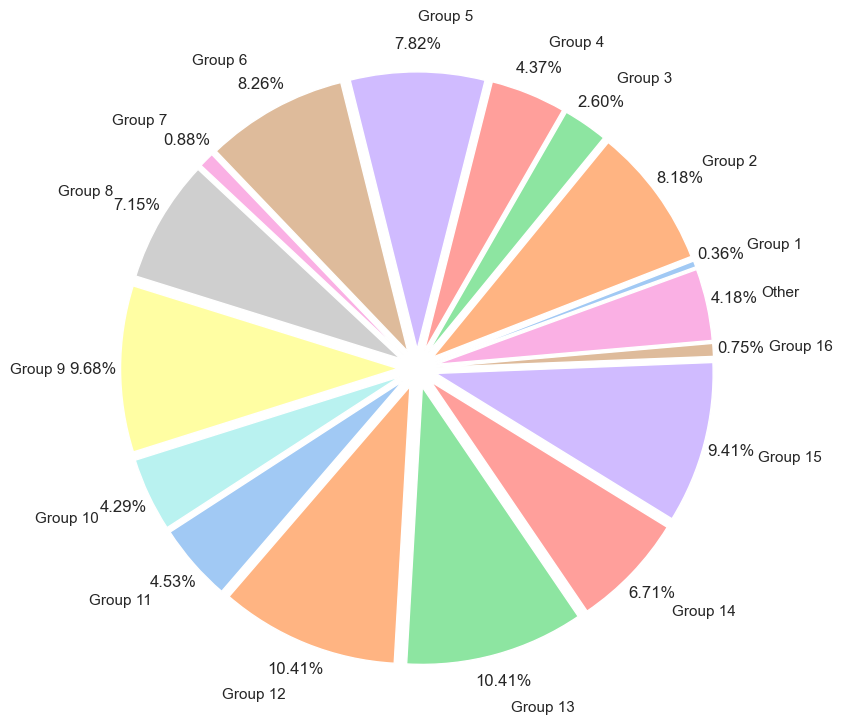

In [60]:
# define Seaborn color palette to use
sns.set(rc={'figure.figsize':(10,9)})
colors = sns.color_palette('pastel')[0:18]

# create explosion values
explode = []
for x in range(1, 18):
    explode.append(0.07)

labels = data_pie.columns
#labels_left = data_pie.columns[6:13]
#labels_right = list(data_pie.columns[0:5]) + list(data_pie.columns[14:17])
#wedges, texts = plt.pie(data_pie.iloc[0], explode=explode, startangle=-20)
#kw = dict(arrowprops=dict(arrowstyle="->"), va="center")
#xy_text = (-1.25, 1.3)
#xy_change = (0, 1)
#
#xy_dist = ()
#y_val = 1.3
#for p, label in zip(wedges[6:13], labels_left):
    #ang = np.deg2rad((p.theta1 + p.theta2)/2)
    #y = np.sin(ang)
    #x = np.cos(ang)
    #xy_change = (0, 0)
    #y_val -= y_val - 0.3
    #horizontalalignment = "center" if abs(x) < abs(y) else "right" if x < 0 else "left"
    #plt.annotate(label, xy=(x, y), xytext=(-1.25, y_val), horizontalalignment=horizontalalignment, **kw, bbox=dict#(boxstyle="round", fc="w"))
# create pie chart
plt.pie(data_pie.iloc[0], labels = labels, colors=colors, explode=explode, autopct='%.2f%%', startangle=20, pctdistance=1.1, labeldistance=1.2)


plt.show()

## Задание 4. EDA

In [2]:
data_covid = pd.read_csv('data/owid-covid-data.csv')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


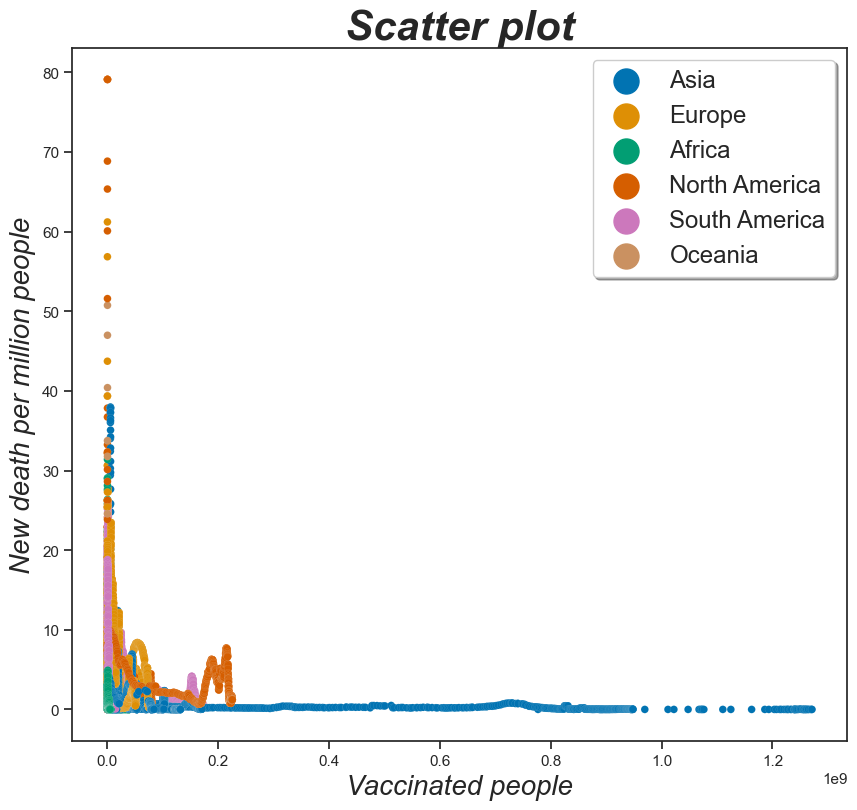

In [10]:
sns.set(rc={'figure.figsize':(10,9)})
sns.set_style('ticks')

covid_scat = sns.scatterplot(data_covid, x='people_fully_vaccinated', y='new_deaths_smoothed_per_million', hue='continent', palette='colorblind', s=30, linewidth=0.05)

# Setting labels
covid_scat.set_title('Scatter plot', weight='bold', style='italic', fontsize=30)
covid_scat.set_xlabel('Vaccinated people', style='italic', fontsize=20)
covid_scat.set_ylabel('New death per million people', style='italic', fontsize=20)
covid_scat.legend(fontsize='x-large', markerscale=3, shadow=True)

In [63]:
south_am_data = data_covid[data_covid['continent'] == 'South America']

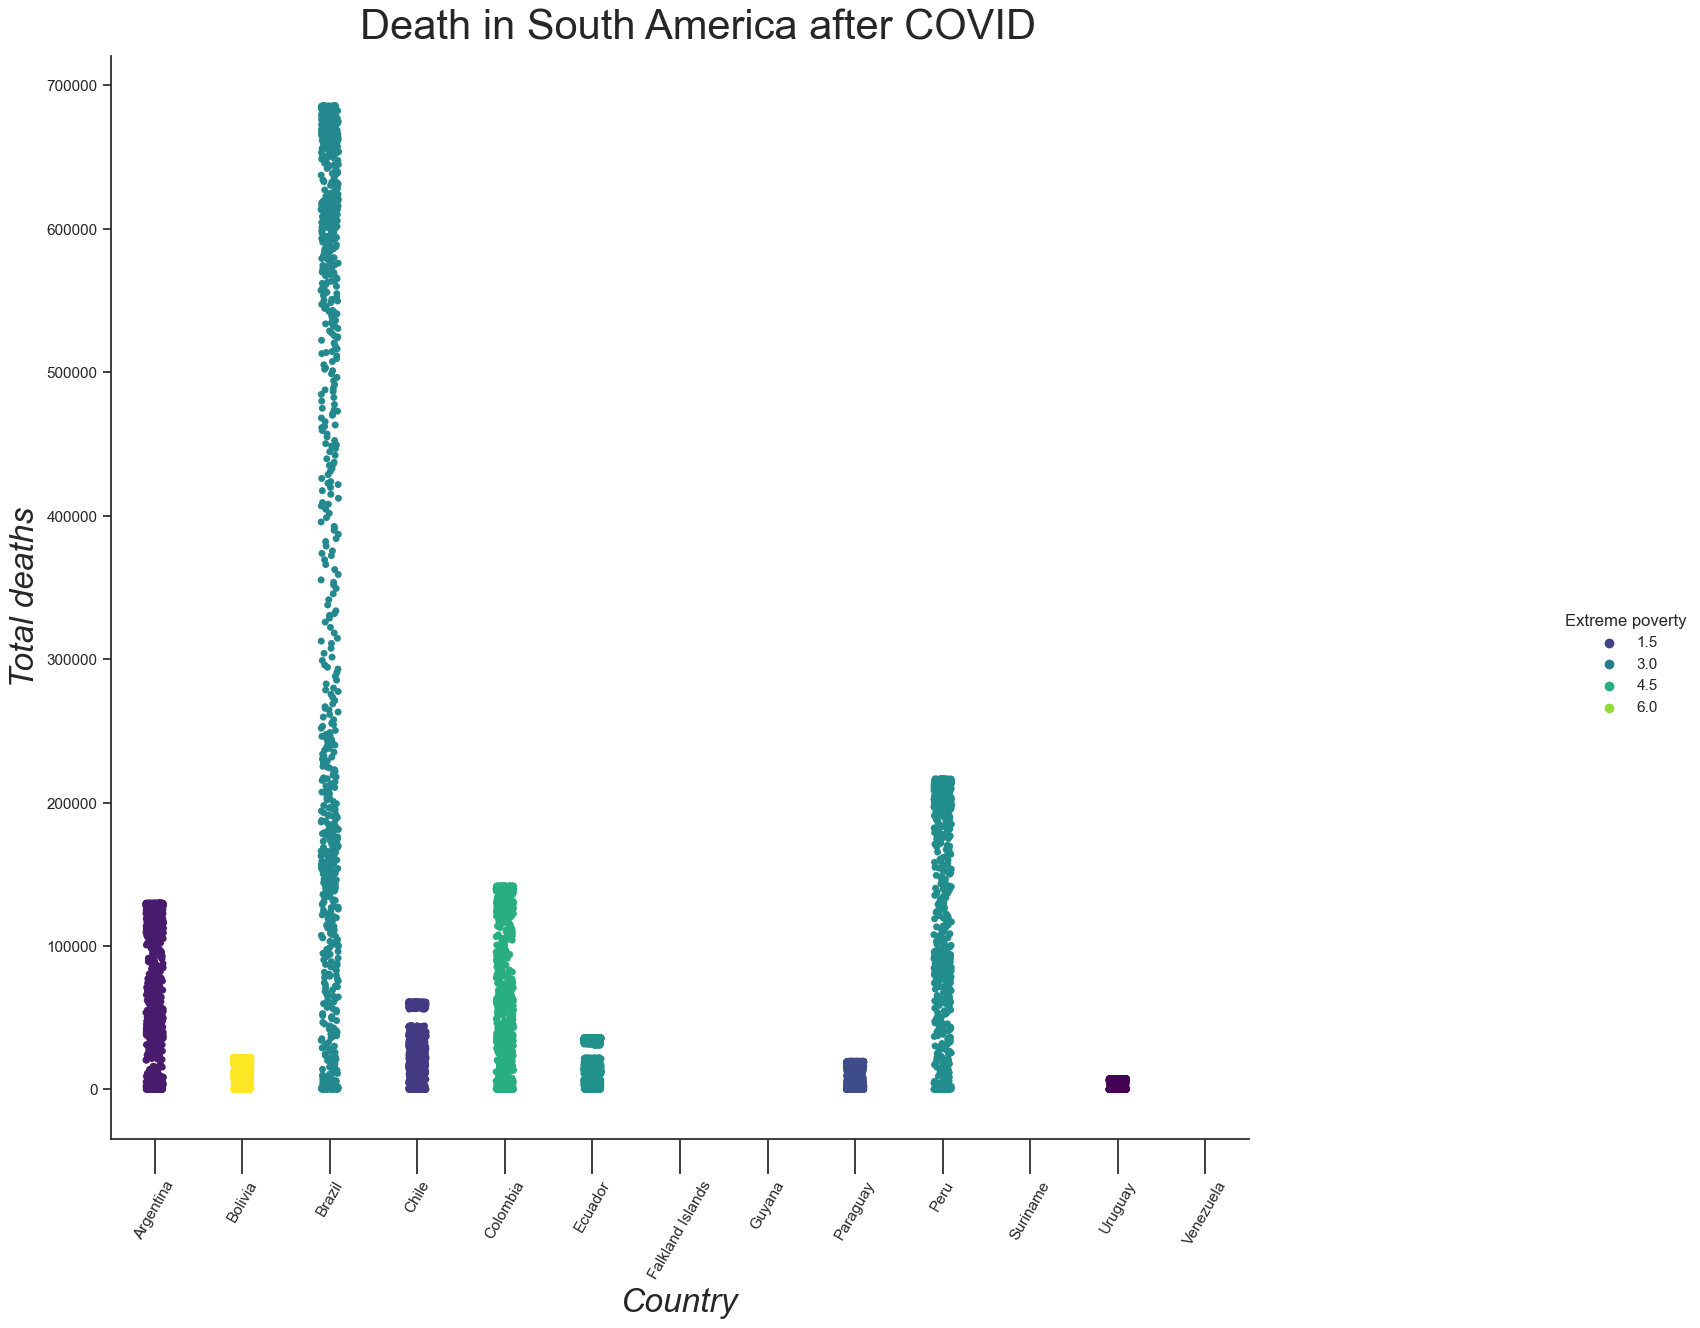

In [144]:
#sns.set(rc={'figure.figsize':(13, 40)})
sns.set_style('ticks')

covid_cat = sns.catplot(south_am_data, x='location', y='total_deaths', hue='extreme_poverty', native_scale=True, zorder=1, palette='viridis')
covid_cat._legend.set_title('Extreme poverty')
covid_cat.fig.set_size_inches(20, 13)
covid_cat.fig.suptitle('Death in South America after COVID', x=0.5, y=1,
                  fontsize=30, fontdict={"weight": "bold"})
covid_cat.set_axis_labels('Country', 'Total deaths', style='italic', fontsize=24)
covid_cat.tick_params(axis='x', rotation=60, size=25)
#for ax in covid_cat.axes.flatten():
    #ax.xlabel('Days to Resolve', fontsize=15)
    #ax.ylabel('Ticket Category', fontsize=15)

Так как я делаю всё в последний момент перед дедлайном, тут немного неупорядоченные графики. Но какие выводы мы можем из них сделать? В условных "благополучных" странах (страны Европы, Бразилия в Южной Америке), был показан больший уровень смертей. При этом почему-то уровень бедности не коррелирует с уровнем смертности по крайней мере в странах Южной Америки. С чем это связано - непонятно, может быть, с тем, что нет достаточного учёта смертей, и, соответственно, они не фиксируются. Первый же график, на примере стран Азии, говорит нам вакцинироваться: больше вакцинации - и никаких смертей. Уменьшение уровни смертности также заметно, если смотришь на страны Европы и Северной Америки, но там менее активно вакцинируются человеки.

Сори за сумбур, ничего в этой жизни не успеваю...